In [3]:
from scipy import stats
import scipy.io
from matplotlib import cm
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import astropy.constants as const
from sunpy.time import parse_time
import sunpy.time
import time
import pickle
import seaborn as sns
import os
import urllib
import json
import warnings
import importlib
import heliopy.spice as spice
import heliopy.data.spice as spicedata
import astropy
import copy

#import 
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

data_path='data/'
plot_path='results/'


/Users/chris/python/miniconda3/envs/helio3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


saved as  results/OMNI2_2018_Mar_25_2023_Mar_24.png
saved as  results/OMNI2_now.png


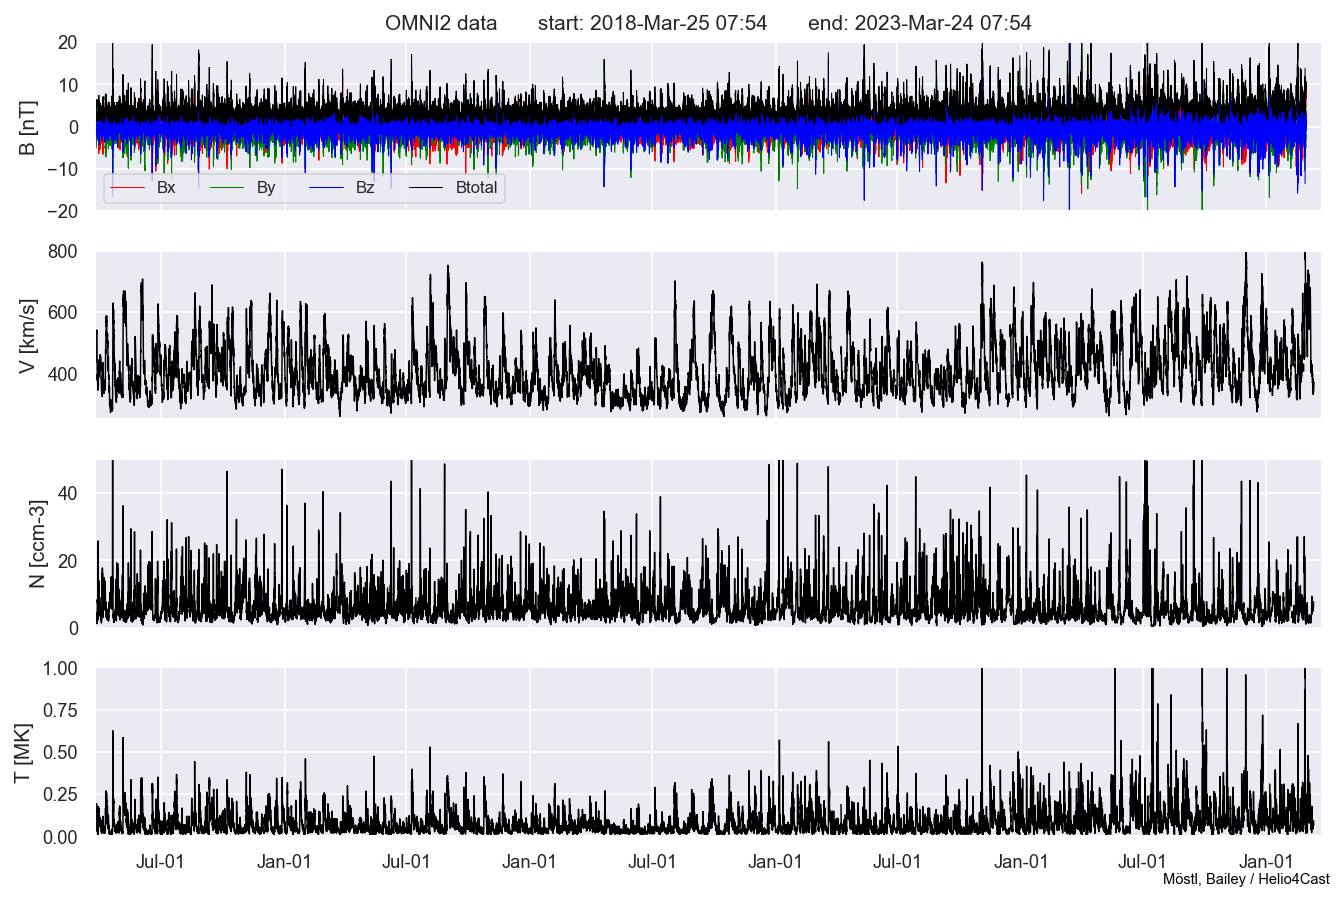

In [4]:
get_new_data=0


fileomni="omni_1963_now.p"
if get_new_data: hd.save_omni_data(data_path,fileomni)
[o,ho]=pickle.load(open(data_path+fileomni, "rb" ) )  

start=datetime.datetime.utcnow() - datetime.timedelta(days=5*365)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update(o, start, end,'OMNI2',plot_path,now=True)

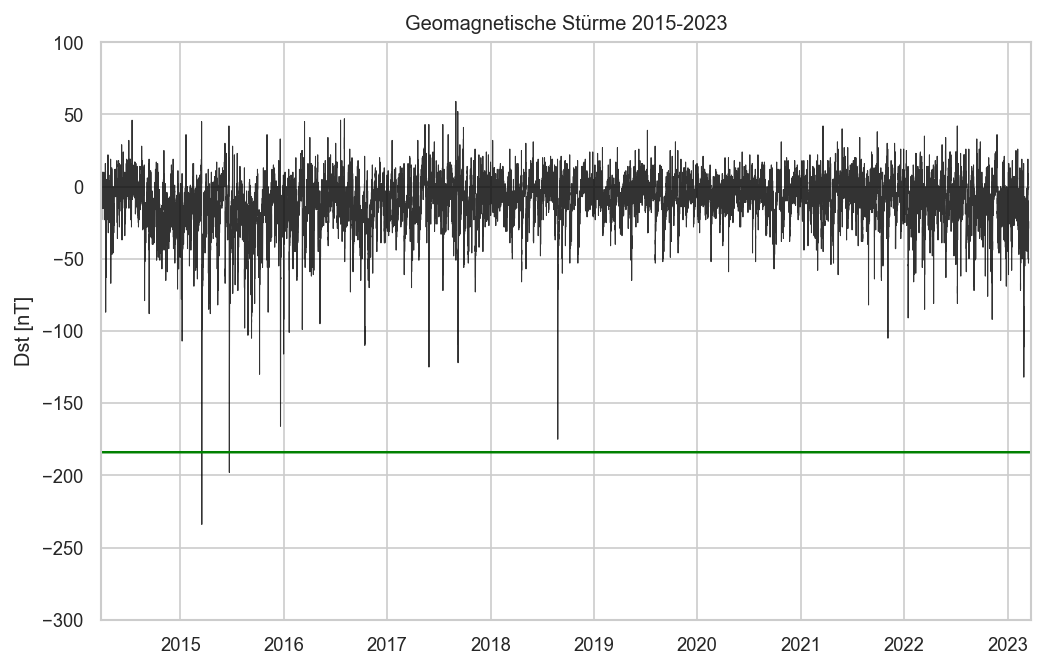

In [43]:
#%matplotlib
#plt.ion()

sns.set_style('whitegrid')

fig=plt.figure(figsize=(8,5), dpi=150)
ax1 = plt.subplot(111) 

ax1.plot(o.time,o.dst,color='k',linewidth=0.5,alpha=0.8)

start=datetime.datetime.utcnow() -datetime.timedelta(days=9*365)
end=datetime.datetime.utcnow() 
ax1.set_xlim(start,end)
ax1.set_ylim(-300,100)
ax1.plot(o.time,np.zeros(np.size(o.time))-184, 'g')
plt.ylabel('Dst [nT]')

plt.title('Geomagnetische Stürme 2015-2023')

plt.savefig(plot_path+'geomagnetic_storm_march2023_deutsch')

#plt.plot(o.time[300000:-1],o.dst[300000:-1])